In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main import Quantities, Cross_Quantities, Abs_Bars3D, Cross_Probability, cross_qndness, cross_fidelity

In [2]:
Datos = []

for k in range(1000):
    loaded = np.load( 'montecarlo_without_GST/datos_mc_{}.npy'.format(k), allow_pickle=True )
    Datos.append( loaded )
    # quantities, quantities_2, cross_quantities, single, double, gst

In [3]:
POVM_single = [  [ d[3][j][0] for j in range(7)  ] for d in Datos]
Choi_single = [  [ d[3][j][1] for j in range(7)  ] for d in Datos]

POVM_double = np.array([  [ [ d[4][j][k][0] for k in range(2) ] for j in range(3) ] for d in Datos])
Choi_double = np.array([  [ [ d[4][j][k][1] for k in range(2) ] for j in range(3)  ] for d in Datos])

qubits = [ [(1,3),(4,5)],[(3,5),(0,1)],[(1,2),(5,6)] ]

In [4]:
quantities = [ [ Quantities( POVM_single[k][j], Choi_single[k][j] ) for j in range(7) ] for k in range(1000) ]
quantities_2 = [ [ [ Quantities( POVM_double[k][j][i], Choi_double[k][j][i] ) for i in range(2) ] for j in range(3) ] for k in range(1000) ] 
cross_quantities = [ [ [ Cross_Quantities( POVM_single[k][qubits[j][i][0]], Choi_single[k][qubits[j][i][0]], 
                                          POVM_single[k][qubits[j][i][1]], Choi_single[k][qubits[j][i][1]] , 
                                          POVM_double[k][j][i], Choi_double[k][j][i] ) 
                        for i in range(2) ] for j in range(3) ] for k in range(1000) ] 

In [5]:
quantities_mean = np.mean( quantities, axis=0 )
quantities_std  = np.std( quantities, axis=0 )

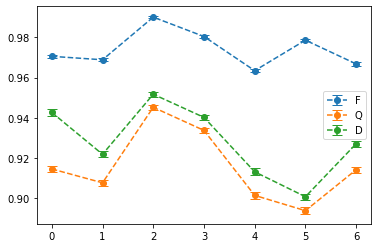

In [6]:
for k in range(3):
    plt.errorbar( x=range(7), y=quantities_mean[:,k], yerr=quantities_std[:,k], capsize=5, fmt='--o' )
plt.legend( ['F','Q', 'D'] )
plt.savefig('quantities_single_2.pdf', bbox_inches='tight' )

In [7]:
quantities_2_mean = np.mean( quantities_2, axis=0 ).reshape(6,-1)
quantities_2_std  = np.std( quantities_2, axis=0 ).reshape(6,-1)

In [8]:
quantities_2_mean

array([[0.94967621, 0.84767796, 0.88328039],
       [0.93986742, 0.80409977, 0.8503186 ],
       [0.95646087, 0.82934304, 0.86053878],
       [0.94042823, 0.83491539, 0.88445177],
       [0.95862694, 0.85106238, 0.88415683],
       [0.94215189, 0.81326198, 0.85714993]])

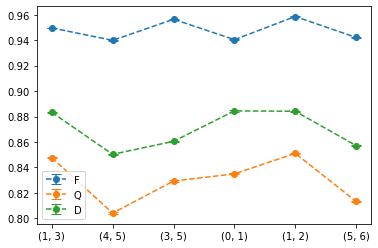

In [9]:
for k in range(3):
    plt.errorbar( x=range(6), y=quantities_2_mean[:,k], yerr=quantities_2_std[:,k], capsize=5, fmt='--o' )
plt.legend( ['F','Q', 'D'] )
plt.xticks( [0,1,2,3,4,5], [(1,3),(4,5),(3,5),(0,1),(1,2),(5,6)] );
plt.savefig('quantities_double_2.pdf', bbox_inches='tight' )

In [10]:
def Cross_Probability( f1, f2, pairs ):
    
    f = []
    for j in range(len(f2)):
        p = pairs[j]
        f.append( abs( f1[p[0]] * f1[p[1]] - f2[j]  ) )
    return f

In [11]:
cfidelity = np.array([ Cross_Probability( np.array(quantities)[j,:,0], np.array(quantities_2).reshape(1000,6,3)[j,:,0],
                                              [ (1,3),(4,5),(3,5),(0,1),(1,2),(5,6) ] ) for j in range(1000) ])
cqndness  = np.array([ Cross_Probability( np.array(quantities)[j,:,1], np.array(quantities_2).reshape(1000,6,3)[j,:,1],
                                              [ (1,3),(4,5),(3,5),(0,1),(1,2),(5,6) ] ) for j in range(1000) ])

In [12]:
#cqndness = np.array( [ [ [ cross_qndness( Choi_single[k][qubits[j][i][0]], Choi_single[k][qubits[j][i][1]], Choi_double[k][j][i]  ) 
#                        for i in range(2) ] for j in range(3) ] for k in range(1000) ] ).reshape(1000, 6 )
#
#cfidelity = np.array( [ [ [ cross_fidelity( POVM_single[k][qubits[j][i][0]],
#                                          POVM_single[k][qubits[j][i][1]],  
#                                          POVM_double[k][j][i] ) 
#                        for i in range(2) ] for j in range(3) ] for k in range(1000) ] ).reshape(1000, 6 )

In [13]:
cross_fidelity_mean = np.mean( cfidelity, axis=0 )
cross_qndness_mean = np.mean( cqndness, axis=0 )
cross_fidelity_std = np.std( cfidelity, axis=0 )
cross_qndness_std = np.std( cqndness, axis=0 )

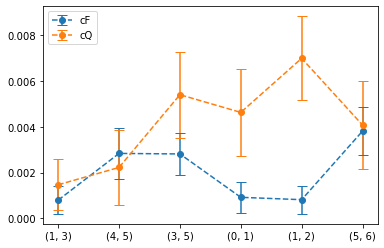

In [14]:
plt.errorbar( x=range(6), y=cross_fidelity_mean, yerr=cross_fidelity_std, capsize=5, fmt='--o' )
plt.errorbar( x=range(6), y=cross_qndness_mean, yerr=cross_qndness_std, capsize=5, fmt='--o' )
plt.legend( ['cF','cQ'] )
plt.xticks( [0,1,2,3,4,5], [(1,3),(4,5),(3,5),(0,1),(1,2),(5,6)] );
plt.savefig('cross_fidelity_2.pdf', bbox_inches='tight' )

In [15]:
cros_quantities_mean = np.mean( cross_quantities, axis=0 ).reshape(6,-1)
cros_quantities_std  = np.std( cross_quantities, axis=0 ).reshape(6,-1)

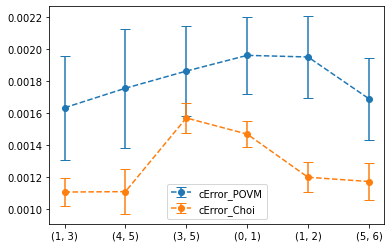

In [17]:
for k in range(2,4):
    plt.errorbar( x=range(6), y=cros_quantities_mean[:,k], yerr=cros_quantities_std[:,k], capsize=5, fmt='--o' )
plt.legend( ['cError_POVM', 'cError_Choi'] )
plt.xticks( [0,1,2,3,4,5], [(1,3),(4,5),(3,5),(0,1),(1,2),(5,6)] );
plt.savefig('cross_error_2.pdf', bbox_inches='tight' )

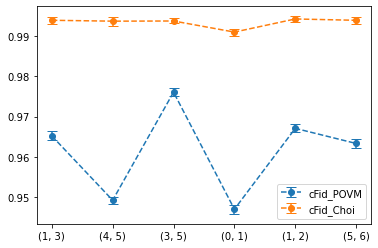

In [18]:
for k in range(2):
    plt.errorbar( x=range(6), y=cros_quantities_mean[:,k], yerr=cros_quantities_std[:,k], capsize=5, fmt='--o' )
plt.legend( ['cFid_POVM','cFid_Choi'] )
plt.xticks( [0,1,2,3,4,5], [(1,3),(4,5),(3,5),(0,1),(1,2),(5,6)] );
plt.savefig('cross_matrix_fidelity_2.pdf', bbox_inches='tight' )

In [19]:
def BarPlot( A , yerr=None, colors = ['r','b','g','y','r','b','g','y','r','b','g','y','r','b','g','y'], ax=None ):
    A = A.T
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot( 111, projection='3d' )
    
    lenx, leny = A.shape
    z = list(A)
    xs = np.arange(lenx)
    ys = np.arange(leny)
    
    for n in range(leny):
        zs = z[n]
        cs = colors[n]
        ax.bar( xs, A[n], n, zdir='y', color=cs, alpha=0.5)
        
        if yerr is not None:
            for i in xs:
                ax.plot( [i,i], [n, n], [A[n,i]+yerr[n,i], A[n,i]-yerr[n,i]], marker="_", color=cs)
        
    return ax
    
    
def Plot_Chois(  choi, error_choi=None, axes=None, z_lim = 0.1, shape = None  ) :
    
    N = len( choi )
    if shape is None:
        xx = 1
        yy = N
    else:
        xx = shape[0]
        yy = shape[1]
    
    if axes is None:
        fig = plt.figure(figsize=[yy*5,xx*5])
        axes = []
        for j in range(N):   
            axes.append( fig.add_subplot( xx, yy, j+1, projection='3d') )
            
    for j in range(N):
        ax = axes[j]
        if error_choi is None:
            ax = BarPlot( abs(choi[j]), None, ax=ax )
        else:
            ax = BarPlot( abs(choi[j]), error_choi[j], ax=ax )
        ax.text( j*N+j, j*N+j, z_lim*1.15, str( np.round(abs(choi[j])[ j*N+j, j*N+j ],3) ) )
        ax.set_zlim([0,z_lim])
    
    return axes
    

In [20]:
Choi_single_mean = np.mean( Choi_single, axis=0 )
Choi_single_std = np.std( Choi_single, axis=0 )

In [21]:
Choi_single_device_mean = np.mean( Choi_single_mean, axis=0 )
Choi_single_device_std  = np.mean( Choi_single_std, axis=0 )

#Choi_single_device_mean = np.mean( Choi_single, axis=(0,1) )
#Choi_single_device_std  = np.std( Choi_single, axis=(0,1) )

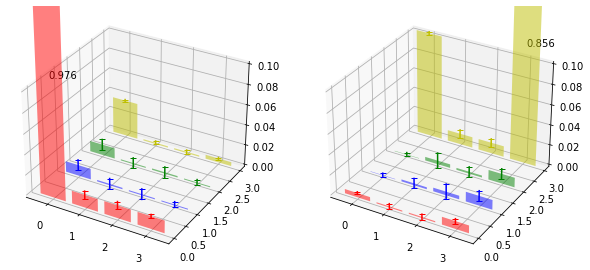

In [22]:
Plot_Chois(Choi_single_device_mean, Choi_single_device_std )
plt.savefig('choi_single_2.pdf', bbox_inches='tight' )

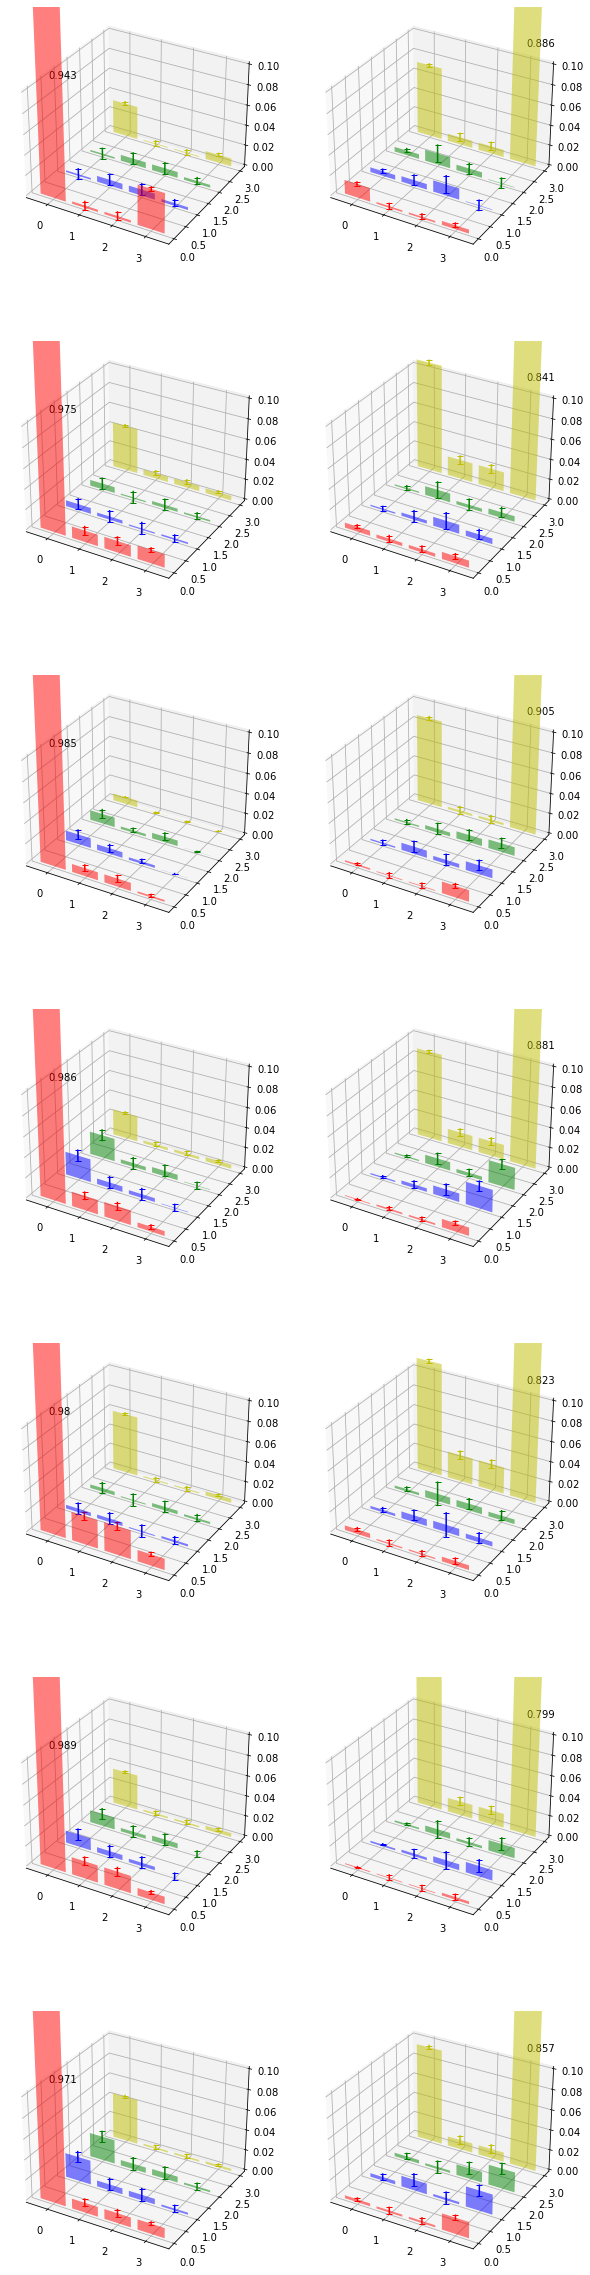

In [23]:
fig = plt.figure(figsize=[10, 6*7])
for idx in range(7):
    ax1 = fig.add_subplot(7,2,2*idx+1, projection='3d')
    ax2 = fig.add_subplot(7,2,2*idx+2, projection='3d')
    Plot_Chois( Choi_single_mean[idx], Choi_single_std[idx], axes=(ax1,ax2) )

In [24]:
Choi_double_mean = np.mean( Choi_double, axis=0 )
Choi_double_std = np.std( Choi_double, axis=0 )

In [25]:
Choi_double_device_mean = np.mean( Choi_double_mean, axis=(0,1) )
Choi_double_device_std  = np.mean( Choi_double_std, axis=(0,1) )

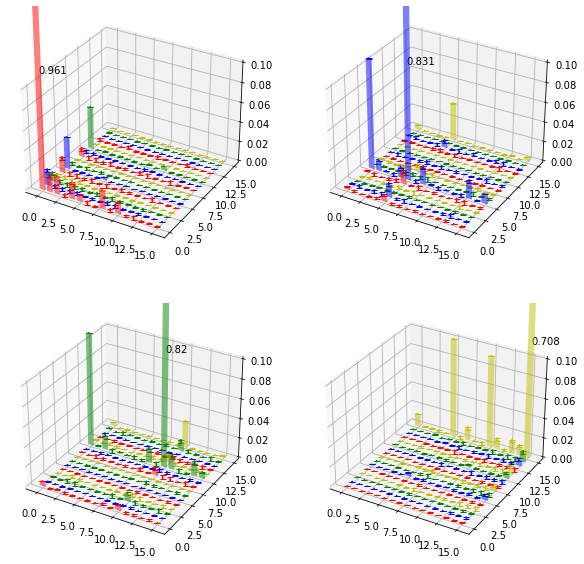

In [26]:
Plot_Chois(Choi_double_device_mean, Choi_double_device_std, shape=(2,2))
plt.savefig('chois_double_2.pdf', bbox_inches='tight' )

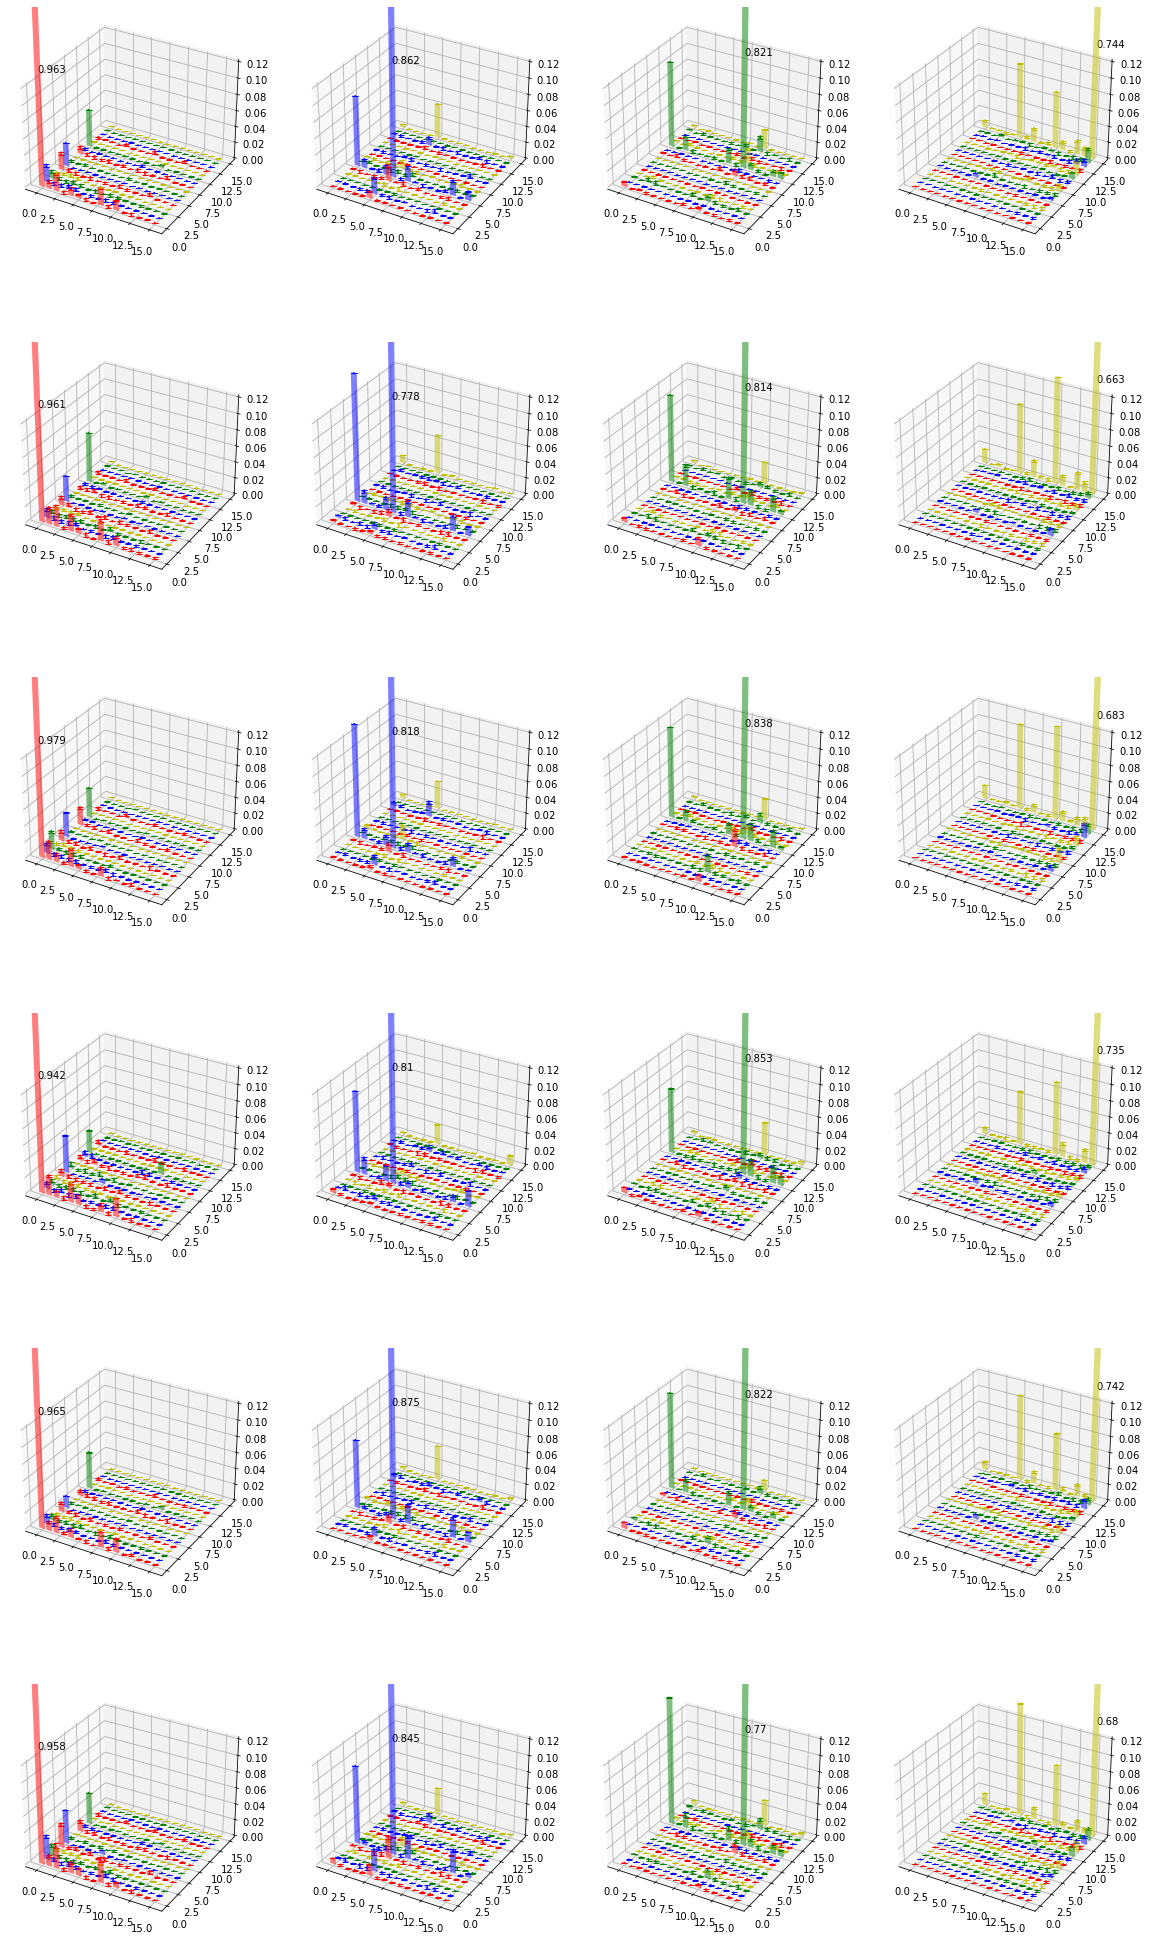

In [27]:
fig = plt.figure(figsize=[20, 6*6])
idx = 0
for idx1 in range(3):
    for idx2 in range(2):
        ax1 = fig.add_subplot( 6, 4, 4*idx+1, projection='3d')
        ax2 = fig.add_subplot( 6, 4, 4*idx+2, projection='3d')
        ax3 = fig.add_subplot( 6, 4, 4*idx+3, projection='3d')
        ax4 = fig.add_subplot( 6, 4, 4*idx+4, projection='3d')
        idx += 1
        Plot_Chois(Choi_double_mean[idx1][idx2], Choi_double_std[idx1][idx2], axes=(ax1,ax2,ax3,ax4), z_lim=0.12)